In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
#Importing the dataset 
df=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleaned.csv")
test=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleanedTest.csv")

In [3]:
#Drop the useless column
df.drop(['Unnamed: 0'], axis=1, inplace =True)
df.drop(['date'], axis=1, inplace =True)
df.drop(['DayName'], axis=1, inplace =True)

test.drop(['Unnamed: 0'], axis=1, inplace =True)
test.drop(['date'], axis=1, inplace =True)
test.drop(['DayName'], axis=1, inplace =True)

In [4]:
#preparing the two datasets splitting the attributes with the class 
attributes = [col for col in df.columns if col != 'Occupancy']
X_train = df[attributes].values
y_train = df['Occupancy']

attributes = [col for col in test.columns if col != 'Occupancy']
X_test = test[attributes].values
y_test = test['Occupancy']
print("Old shape of the dataset:")
print(X_train.shape)

Old shape of the dataset:
(8143, 8)


In [5]:
#Reducing the number of the attribute
accuracy = []
trsh = []
for count in range(1,101):
    
    sel = VarianceThreshold(threshold=(count/100 * (1 - count/100)))
    X_train_sel = sel.fit_transform(X_train)
    X_test_sel = sel.transform(X_test)
    trs=count/100 * (1 - count/100)
    trsh.append(count/100 * (1 - count/100))
    
    print('Threshold= %s' % trs)
    print('Shape:')
    print(X_train_sel.shape)
    X_test_sel = sel.transform(X_test)
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                             min_samples_split=2, min_samples_leaf=1)
    clf.fit(X_train_sel, y_train)
    y_pred = clf.predict(X_test_sel)
    print('Accuracy %s' % accuracy_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))


#print("New shape of the dataset:")
#print(X_train_sel.shape)

Threshold= 0.0099
Shape:
(8143, 7)
Accuracy 0.9354596622889306
Threshold= 0.0196
Shape:
(8143, 7)
Accuracy 0.925328330206379
Threshold= 0.029099999999999997
Shape:
(8143, 7)
Accuracy 0.9354596622889306
Threshold= 0.0384
Shape:
(8143, 7)
Accuracy 0.926078799249531
Threshold= 0.0475
Shape:
(8143, 7)
Accuracy 0.926078799249531
Threshold= 0.05639999999999999
Shape:
(8143, 7)
Accuracy 0.925328330206379
Threshold= 0.0651
Shape:
(8143, 7)
Accuracy 0.925328330206379
Threshold= 0.0736
Shape:
(8143, 7)
Accuracy 0.925328330206379
Threshold= 0.0819
Shape:
(8143, 7)
Accuracy 0.925328330206379
Threshold= 0.09000000000000001
Shape:
(8143, 7)
Accuracy 0.925328330206379
Threshold= 0.0979
Shape:
(8143, 7)
Accuracy 0.926078799249531
Threshold= 0.1056
Shape:
(8143, 7)
Accuracy 0.9354596622889306
Threshold= 0.1131
Shape:
(8143, 7)
Accuracy 0.926078799249531
Threshold= 0.12040000000000001
Shape:
(8143, 7)
Accuracy 0.9354596622889306
Threshold= 0.1275
Shape:
(8143, 7)
Accuracy 0.9347091932457786
Threshold= 0

Text(0, 0.5, 'Accuracy')

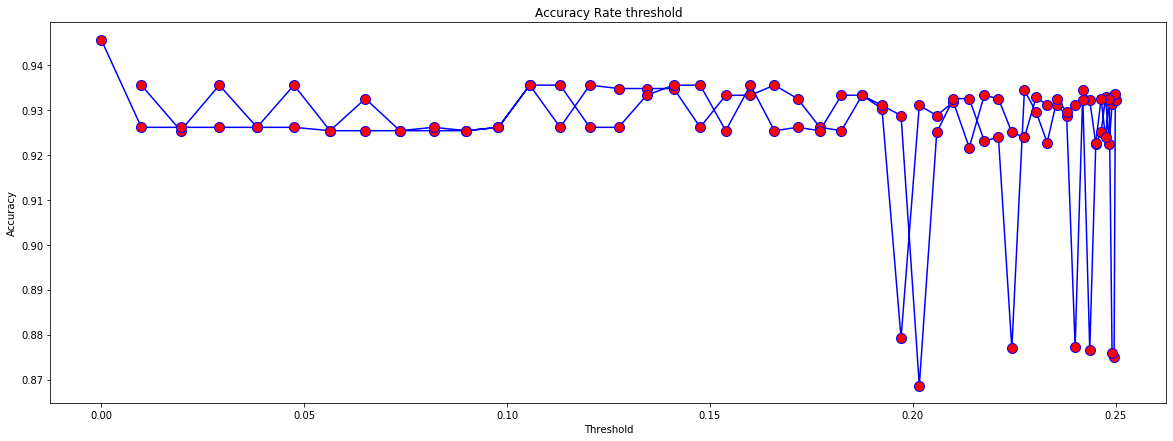

In [6]:
#Graph of the variation of the accuracy at the variation of K
plt.figure(figsize=(20, 7))
plt.plot(trsh, accuracy, color='blue', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')

In [7]:
#Try the classification using the ORIGINAL decision tree with the ORIGINAL prepared dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score


clf = DecisionTreeClassifier(criterion='gini', max_depth=7, 
                             min_samples_split=2, min_samples_leaf=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy 0.9455909943714822
F1-score [0.95808037 0.92250134]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1693
           1       0.96      0.89      0.92       972

    accuracy                           0.95      2665
   macro avg       0.95      0.93      0.94      2665
weighted avg       0.95      0.95      0.95      2665



array([[1657,   36],
       [ 109,  863]])

In [8]:
#Reducing the attribute using a Key (K)
sel = SelectKBest(k=4)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

(8143, 4)

In [9]:
#See the classification using the reducted dataset
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy 0.9129455909943714
F1-score [0.93461105 0.8698092 ]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1693
           1       0.96      0.80      0.87       972

    accuracy                           0.91      2665
   macro avg       0.93      0.89      0.90      2665
weighted avg       0.92      0.91      0.91      2665



array([[1658,   35],
       [ 197,  775]])

In [10]:
#See the accuracy with the different values of Key
accuracy = []
for count in range(1,9):
    sel = SelectKBest(k=count)
    X_train_sel = sel.fit_transform(X_train, y_train)
    X_train_sel.shape
    print('K= %s' % count)
    X_test_sel = sel.transform(X_test)
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1)
    clf.fit(X_train_sel, y_train)
    y_pred = clf.predict(X_test_sel)
    print('Accuracy %s' % accuracy_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))

K= 1
Accuracy 0.9786116322701689
K= 2
Accuracy 0.9669793621013133
K= 3
Accuracy 0.9178236397748593
K= 4
Accuracy 0.900562851782364
K= 5
Accuracy 0.8968105065666041
K= 6
Accuracy 0.9467166979362102
K= 7
Accuracy 0.9332082551594747
K= 8
Accuracy 0.9463414634146341


Text(0, 0.5, 'Accuracy')

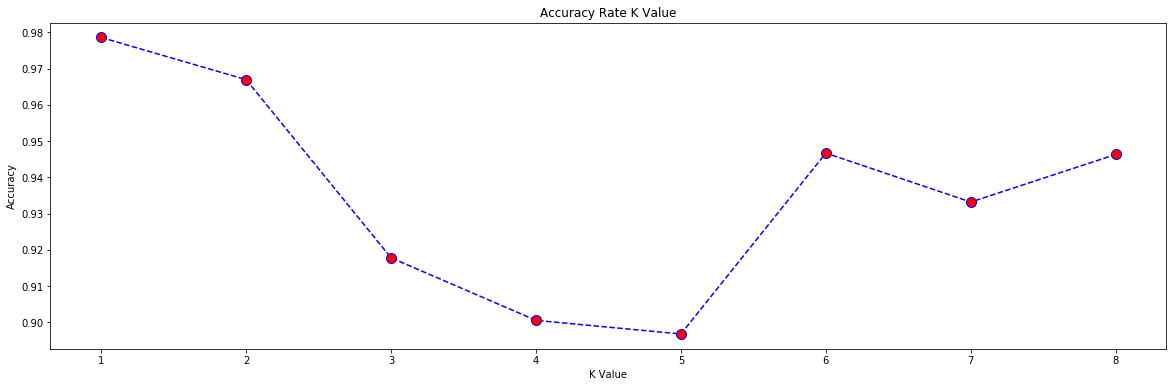

In [11]:
#Graph of the variation of the accuracy at the variation of K
plt.figure(figsize=(20, 6))
plt.plot(range(1, 9), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [12]:
#Reducing the dataset starting from the model
sel = SelectFromModel(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1))
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

(8143, 2)

In [13]:
#See the classification using the reducted dataset
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9786116322701689
F1-score [0.98288802 0.97148574]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



In [14]:
#Aplly the PCA algorithm with n_components=2 for plotting the dataset
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

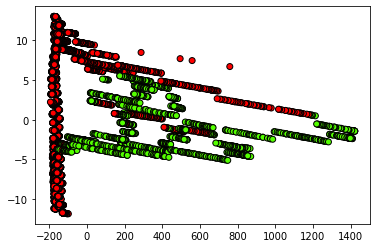

In [15]:
#Plotting the dataset
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=1)
plt.show()

In [16]:
##See the classification using the reducted dataset with PCA
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8667917448405253
F1-score [0.89883158 0.80505217]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1693
           1       0.86      0.75      0.81       972

    accuracy                           0.87      2665
   macro avg       0.87      0.84      0.85      2665
weighted avg       0.87      0.87      0.86      2665

